In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Ignore warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(url, header=None, names=columns)

# Display dataset overview
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Splitting the dataset
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

Logistic Regression Performance:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

ROC-AUC: 0.8229629629629629


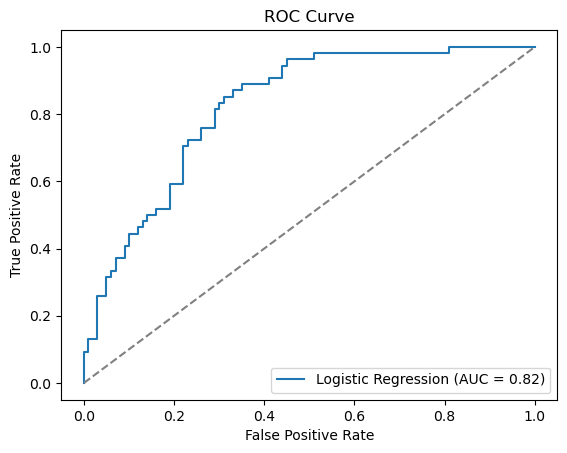

In [5]:
# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_logistic))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_logistic)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [9]:
# Decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions for the decision tree model
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]


In [11]:
# Summarize results
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_tree)],
    "ROC-AUC": [roc_auc_score(y_test, y_prob_logistic), roc_auc_score(y_test, y_prob_tree)]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.714286  0.822963
1        Decision Tree  0.720779  0.665741


In [13]:
# Summarize results
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_tree)],
    "ROC-AUC": [roc_auc_score(y_test, y_prob_logistic), roc_auc_score(y_test, y_prob_tree)]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.714286  0.822963
1        Decision Tree  0.720779  0.665741


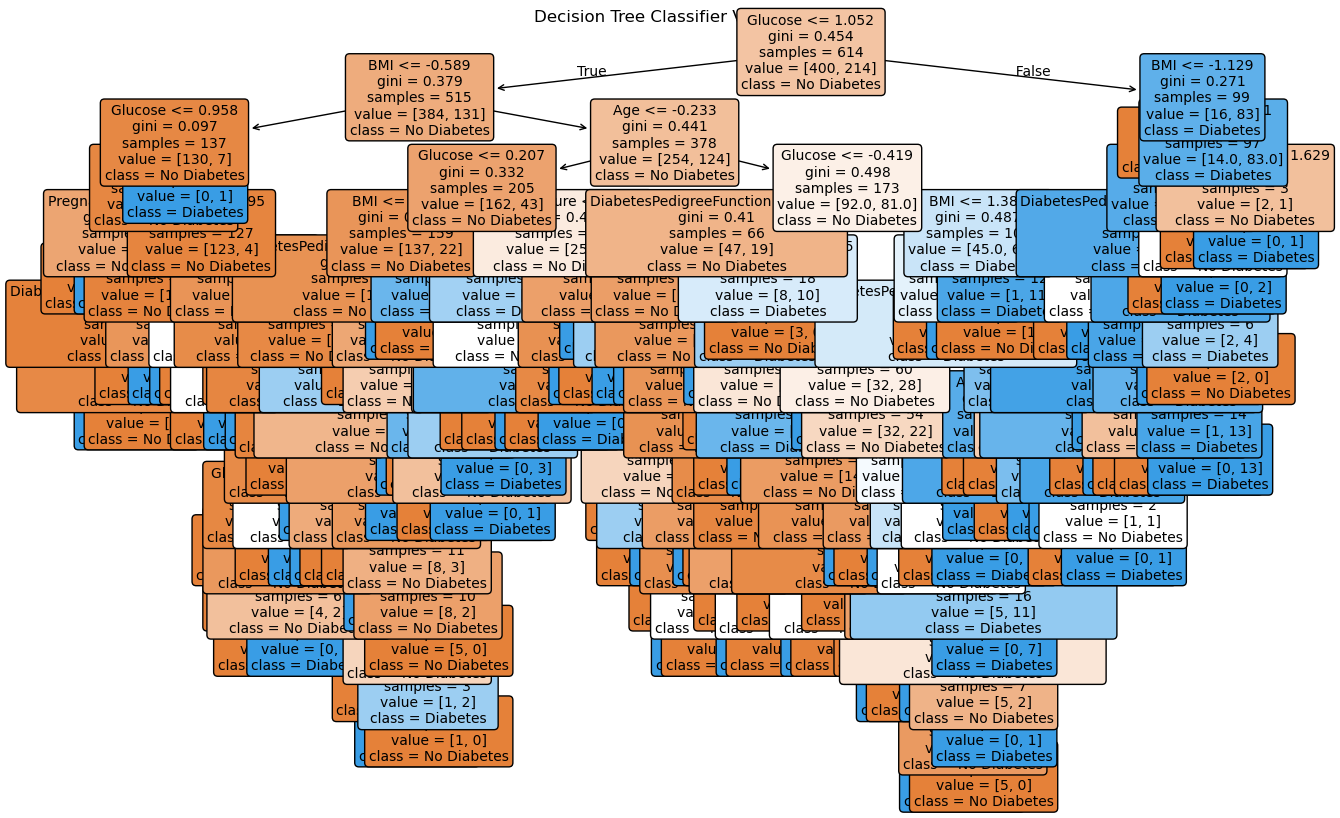

In [15]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, 
          feature_names=X.columns,  # Features' names
          class_names=["No Diabetes", "Diabetes"],  # Target variable classes
          filled=True,  # Color the nodes
          rounded=True,  # Round the corners of the boxes
          fontsize=10)  # Set font size for labels
plt.title("Decision Tree Classifier Visualization")
plt.show()



In [17]:
# Performance metrics for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test, y_prob_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)

# Performance metrics for Decision Tree
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_roc_auc = roc_auc_score(y_test, y_prob_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

# Summarizing results in a DataFrame
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [logistic_accuracy, tree_accuracy],
    "ROC-AUC": [logistic_roc_auc, tree_roc_auc]
}

results_df = pd.DataFrame(results)
print("Comparison of Logistic Regression and Decision Tree Classifier:")
print(results_df)

# Optionally print classification reports
print("\nLogistic Regression Classification Report:")
print(logistic_classification_report)

print("\nDecision Tree Classification Report:")
print(tree_classification_report)


Comparison of Logistic Regression and Decision Tree Classifier:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.714286  0.822963
1        Decision Tree  0.720779  0.665741

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



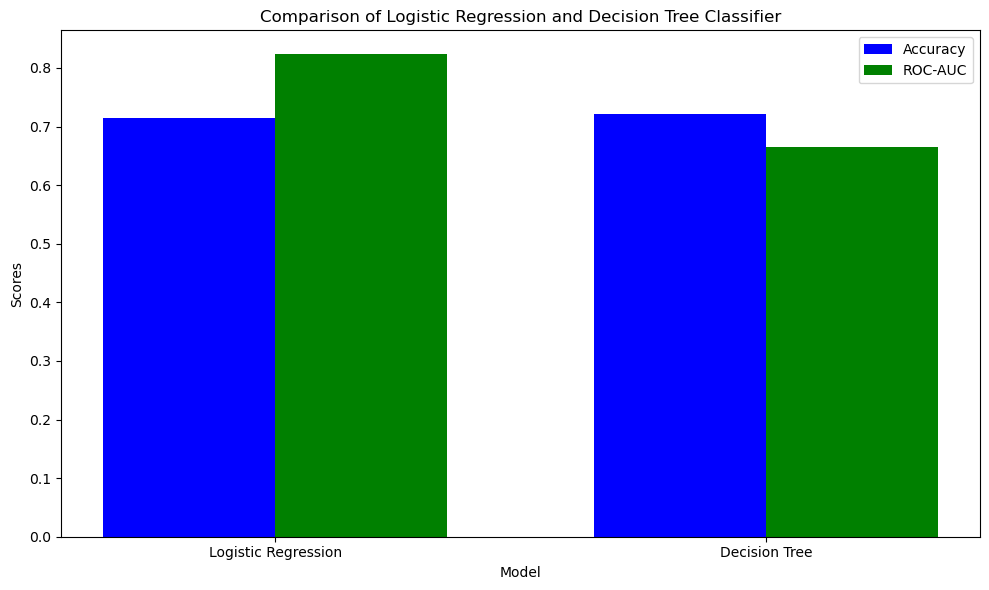

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ["Logistic Regression", "Decision Tree"]
accuracy_scores = [logistic_accuracy, tree_accuracy]
roc_auc_scores = [logistic_roc_auc, tree_roc_auc]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the accuracy and ROC-AUC scores side by side
bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, roc_auc_scores, bar_width, label='ROC-AUC', color='g')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Decision Tree Classifier')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
